# 📊 NLP Analysis of Inaugural Addresses of the Last 5 U.S. Presidents

In this project, we will perform Natural Language Processing (NLP) techniques on the inaugural speeches of the last five U.S. presidents: Bill Clinton, George W. Bush, Barack Obama, Donald Trump, and Joe Biden.

The main objectives:
- Count the number of sentences in each speech.
- Analyze the overall sentiment of each speech.
- Identify the most frequent words.
- Visualize word frequencies and sentiments using charts.
- Summarize key insights at the end of the analysis.

We will be using **Python** and **popular NLP libraries like NLTK, TextBlob, and wordcloud** for this project.  
Let's get started!


## 📦 Importing Required Libraries

In this cell, we import the necessary Python libraries for data processing, visualization, and NLP operations.  
We also download essential NLTK resources such as the Punkt tokenizer and stopwords list.


In [2]:
# Install necessary libraries if not already installed
# !pip install nltk textblob wordcloud matplotlib seaborn pandas

# Import libraries
import pandas as pd
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yigit_obr9zmk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yigit_obr9zmk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📥 Loading and Preparing the Data

We load the inaugural speeches text file and split it into individual speeches using the '===' separator.  
Each speech ends with a line containing the president's last name prefixed by a hyphen (e.g., '-clinton').  
We then create a pandas DataFrame with two columns: 'President' and 'Speech'.

In [3]:
# Load the text file
with open('speeches.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Split speeches by "===" separator
speech_sections = text.split("===")

# Prepare a list of tuples: (president, speech)
speeches = []
for section in speech_sections:
    lines = section.strip().split("\n")
    if lines:
        tag_line = lines[-1]  # The last line contains the president's name tag (e.g., -clinton)
        speech_text = " ".join(lines[:-1])
        president = tag_line.replace("-", "").strip()
        speeches.append((president, speech_text))

# Create a DataFrame
df = pd.DataFrame(speeches, columns=['President', 'Speech'])

# Display the first few rows
df.head()


,President,Speech
0,Clinton,My fellow citizens : Today we celebrate the m...
1,Bush,"President Clinton, distinguished guests and my..."
2,Obama,My fellow citizens: I stand here today humble...
3,Trump,"Chief Justice Roberts, President Carter, Presi..."
4,Biden,"Chief Justice Roberts, Vice President Harris, ..."


## 🧹 Data Cleaning and Basic Text Statistics

In this cell:
- We tokenize each speech into sentences and words.
- We clean the words by removing punctuation and converting them to lowercase.
- We count the number of sentences and words in each speech.
- We calculate the average sentence length (number of words per sentence).

These basic statistics will give us an overview of the speech structures.

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text and tokenize
def preprocess_text(text):
    # Tokenize into sentences
    sentences = sent_tokenize(text)
    
    # Tokenize into words
    words = word_tokenize(text.lower())
    
    # Remove punctuation from words
    words = [word for word in words if word.isalpha()]
    
    return sentences, words

# Apply function to each speech
df['Sentences'] = df['Speech'].apply(lambda x: preprocess_text(x)[0])
df['Words'] = df['Speech'].apply(lambda x: preprocess_text(x)[1])

# Count number of sentences and words
df['Sentence_Count'] = df['Sentences'].apply(len)
df['Word_Count'] = df['Words'].apply(len)

# Calculate average sentence length (in words)
df['Avg_Sentence_Length'] = df['Word_Count'] / df['Sentence_Count']

# Display updated DataFrame
df[['President', 'Sentence_Count', 'Word_Count', 'Avg_Sentence_Length']]


,President,Sentence_Count,Word_Count,Avg_Sentence_Length
0,Clinton,93,1582,17.010753
1,Bush,97,1582,16.309278
2,Obama,122,2398,19.655738
3,Trump,86,1439,16.732558
4,Biden,185,2506,13.545946


## 📊 Visualizing Sentence and Word Counts

Here we use bar plots to visualize:
- The total number of sentences in each inaugural speech.
- The total number of words in each speech.

This helps compare speech lengths across different presidents.


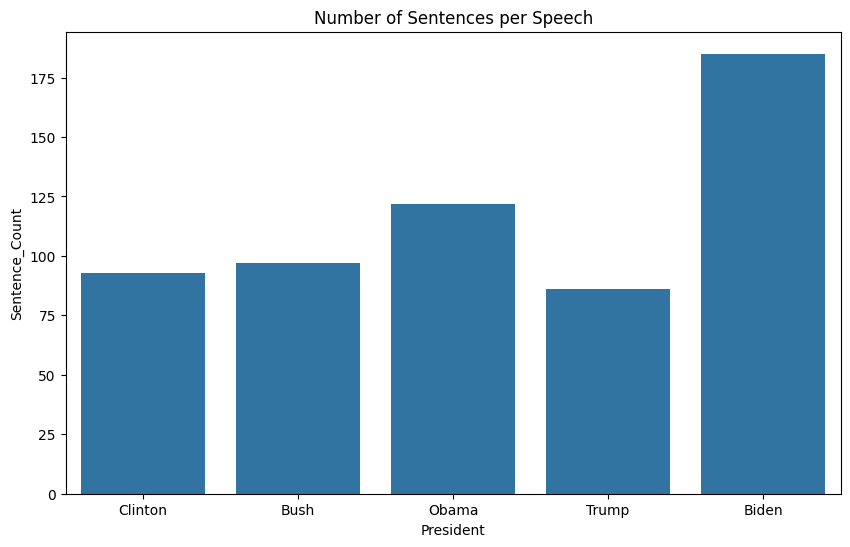

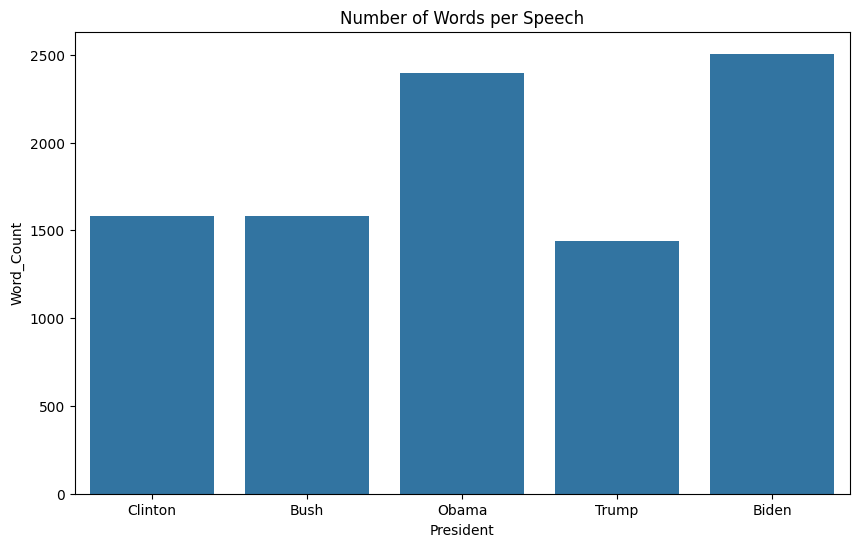

In [6]:
# Barplot for sentence and word counts
plt.figure(figsize=(10,6))
sns.barplot(x='President', y='Sentence_Count', data=df)
plt.title('Number of Sentences per Speech')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='President', y='Word_Count', data=df)
plt.title('Number of Words per Speech')
plt.show()


## 🔧 Enhanced Preprocessing

Before we tokenize, we will normalize certain abbreviations so they don’t get split into misleading tokens.  
For example:
- Replace “U.S.” and “U.S.A.” with “United States” (so we don’t count “us” as the pronoun).
- You can add more rules here if you spot other problematic splits.


In [8]:
import re

def normalize_abbreviations(text):
    # Normalize U.S., U.S.A., U.S to "United States"
    text = re.sub(r'\bU\.S\.A\.\b', 'United States', text)
    text = re.sub(r'\bU\.S\.\b', 'United States', text)
    text = re.sub(r'\bU\.S\b', 'United States', text)
    # Add more normalization rules here if needed
    return text

# Update our preprocess function to include normalization
def preprocess_text(text):
    # Normalize abbreviations first
    text = normalize_abbreviations(text)
    
    # Tokenize into sentences
    sentences = sent_tokenize(text)
    
    # Tokenize into words
    words = word_tokenize(text.lower())
    
    # Remove punctuation from words
    words = [word for word in words if word.isalpha()]
    
    return sentences, words

# Re-apply to DataFrame
df['Sentences'] = df['Speech'].apply(lambda x: preprocess_text(x)[0])
df['Words']     = df['Speech'].apply(lambda x: preprocess_text(x)[1])
df['Sentence_Count']     = df['Sentences'].apply(len)
df['Word_Count']         = df['Words'].apply(len)
df['Avg_Sentence_Length'] = df['Word_Count'] / df['Sentence_Count']

df[['President', 'Sentence_Count', 'Word_Count', 'Avg_Sentence_Length']]


,President,Sentence_Count,Word_Count,Avg_Sentence_Length
0,Clinton,93,1582,17.010753
1,Bush,97,1582,16.309278
2,Obama,122,2398,19.655738
3,Trump,86,1439,16.732558
4,Biden,185,2506,13.545946


## 📈 Word Frequency Analysis

Now that our text is clean and abbreviations are normalized, let's:
1. Remove stopwords.
2. Calculate the top 15 most frequent words in each speech.
3. Visualize the overall top words across all speeches using a bar chart.
4. Generate individual word clouds for each president.


Below is the bar chart showing the top 15 words across all five inaugural addresses (excluding English stopwords).  
We'll follow this with individual word clouds in the next step.


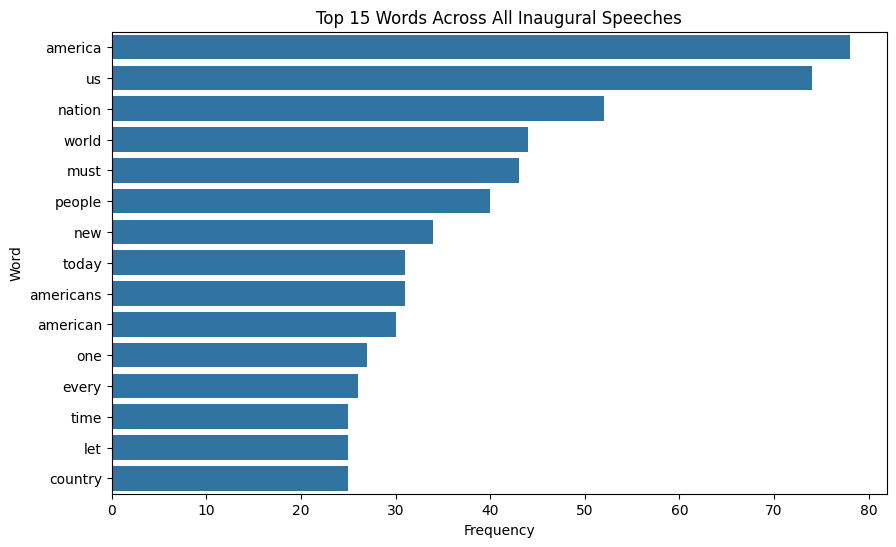

In [9]:
from collections import Counter

# Create a DataFrame to hold frequencies
freq_frames = []

# Overall counter for all speeches
overall_counter = Counter()

for idx, row in df.iterrows():
    words = [w for w in row['Words'] if w not in stop_words]
    counter = Counter(words)
    most_common = counter.most_common(15)
    
    # Store per-president frequencies
    temp_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
    temp_df['President'] = row['President']
    freq_frames.append(temp_df)
    
    # Update overall
    overall_counter.update(words)

# Concatenate per-president top words
freq_df = pd.concat(freq_frames, ignore_index=True)

# Overall top 15 words
overall_top = overall_counter.most_common(15)
overall_df = pd.DataFrame(overall_top, columns=['Word', 'Frequency'])

# Plot overall top words
plt.figure(figsize=(10,6))
sns.barplot(data=overall_df, x='Frequency', y='Word')
plt.title('Top 15 Words Across All Inaugural Speeches')
plt.show()


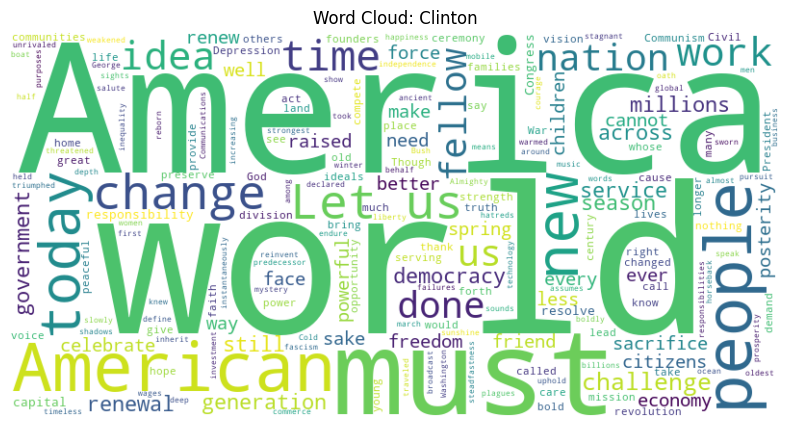

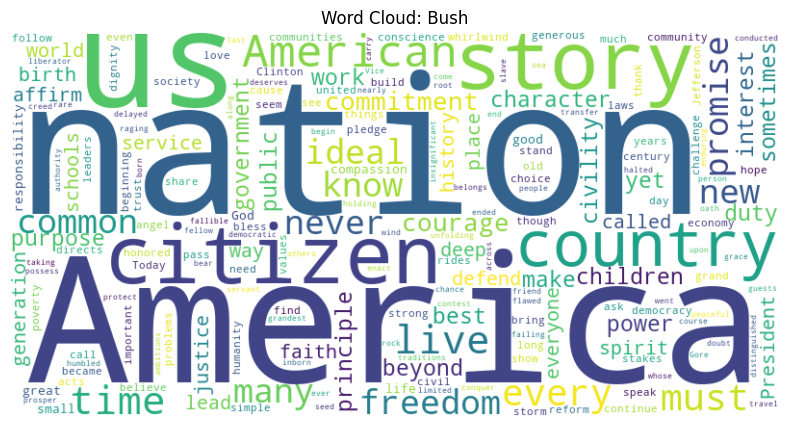

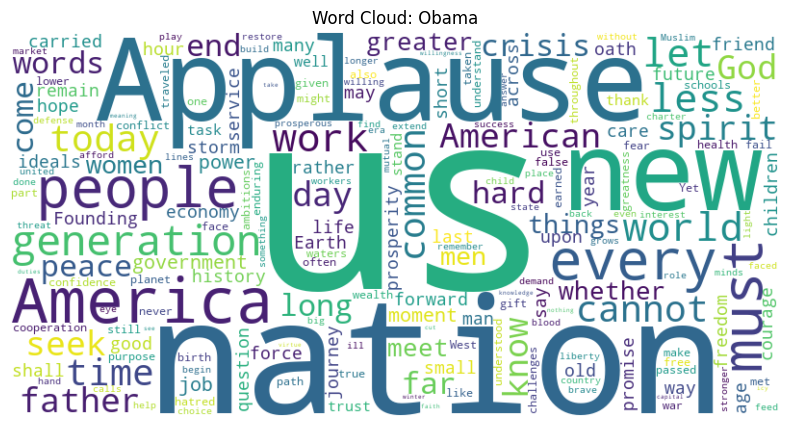

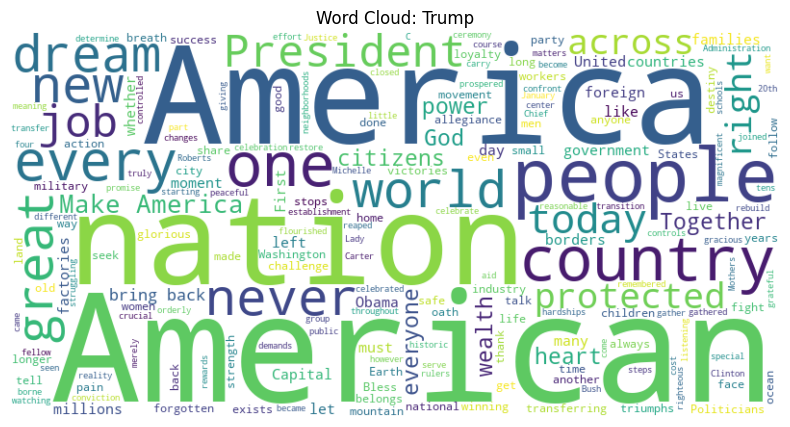

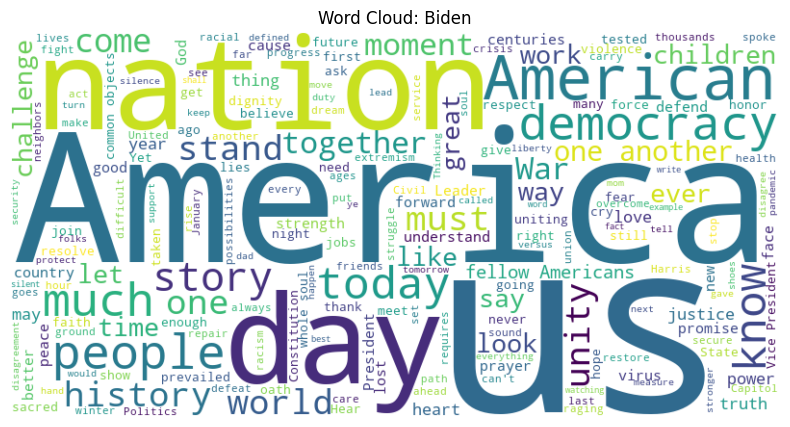

In [10]:
# Generate a word cloud for each president
for president in df['President']:
    text = " ".join(df.loc[df['President'] == president, 'Speech'].apply(normalize_abbreviations))
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud: {president.title()}')
    plt.show()


## ☁️ Word Clouds

The above word clouds visualize the most prominent words used by each president in their inaugural address.  
Darker and larger words appear more frequently.


## 😊 Sentiment Analysis

In this section, we will:
1. Compute an overall sentiment polarity score for each speech.
2. Compute sentence‑level sentiment scores to observe fluctuations within each address.
3. Visualize:
   - A bar chart comparing overall sentiment across presidents.
   - Line charts showing sentiment over the course of each speech.


,President,Polarity,Subjectivity
0,Clinton,0.148440,0.506335
1,Bush,0.188133,0.469805
2,Obama,0.085786,0.470372
3,Trump,0.153775,0.401551
4,Biden,0.169690,0.460089


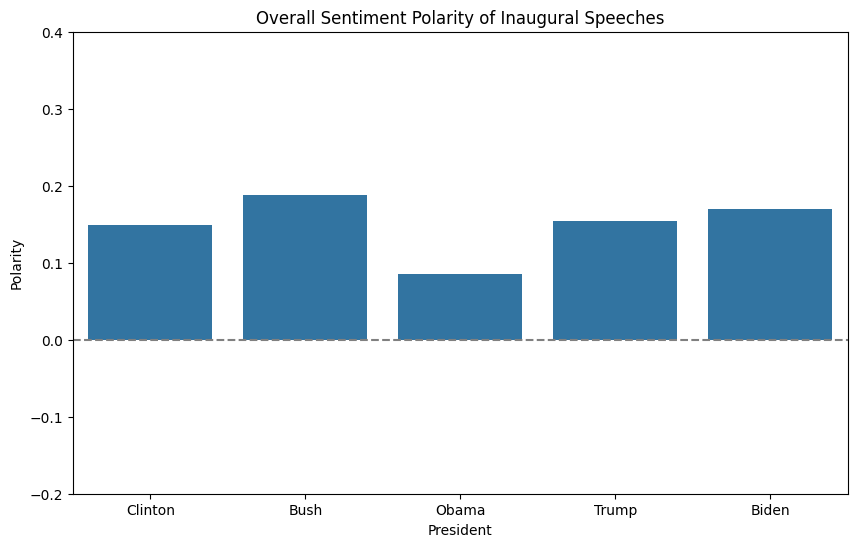

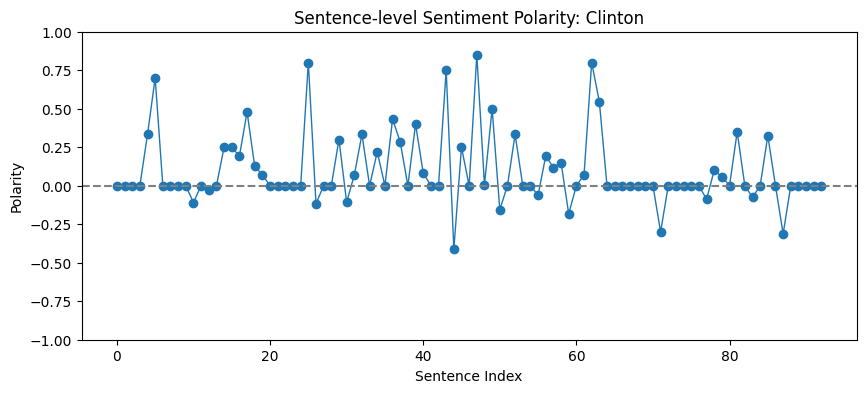

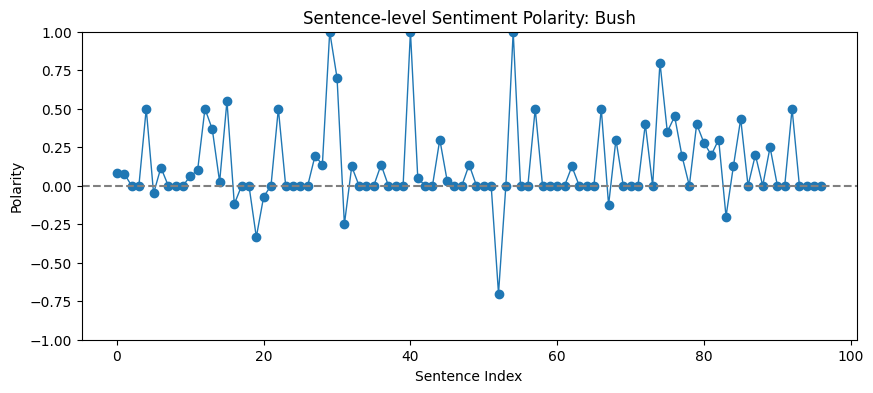

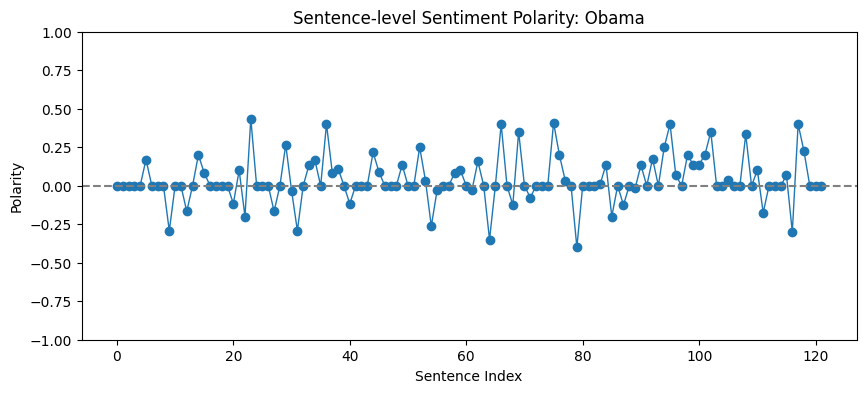

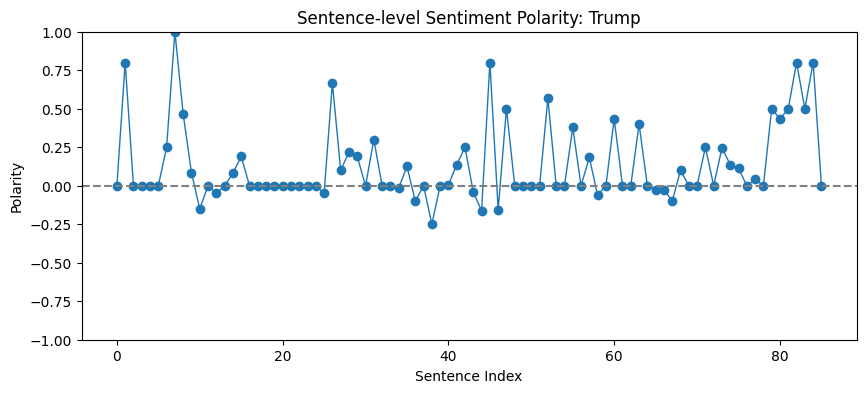

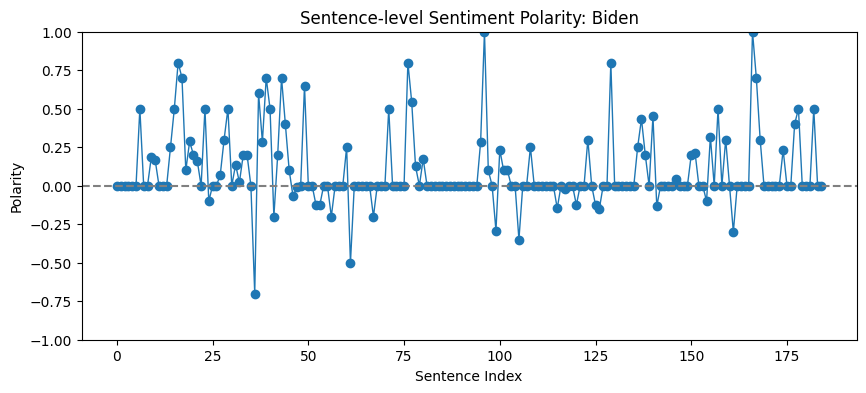

In [16]:
# Function to compute sentiment
def get_sentiment_scores(text):
    blob = TextBlob(text)
    # Polarity: [-1.0, 1.0] where -1 is very negative, +1 is very positive
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Overall sentiment per speech
df['Polarity'], df['Subjectivity'] = zip(*df['Speech'].apply(get_sentiment_scores))
display(df[['President', 'Polarity', 'Subjectivity']])

# Sentence‑level sentiment
sentence_sentiments = []
for idx, row in df.iterrows():
    s_scores = []
    for sentence in row['Sentences']:
        polarity, subj = get_sentiment_scores(sentence)
        s_scores.append(polarity)
    sentence_sentiments.append(s_scores)

df['Sentence_Polarities'] = sentence_sentiments

# Bar chart of overall polarity
plt.figure(figsize=(10,6))
sns.barplot(x='President', y='Polarity', data=df)
plt.title('Overall Sentiment Polarity of Inaugural Speeches')
plt.ylim(-0.2, 0.4)  # adjust to show differences clearly
plt.axhline(0, color='grey', linestyle='--')
plt.show()

# Line charts of sentence‑level polarity for each president
for idx, row in df.iterrows():
    plt.figure(figsize=(10,4))
    plt.plot(row['Sentence_Polarities'], marker='o', linewidth=1)
    plt.title(f"Sentence-level Sentiment Polarity: {row['President'].title()}")
    plt.xlabel('Sentence Index')
    plt.ylabel('Polarity')
    plt.ylim(-1, 1)
    plt.axhline(0, color='grey', linestyle='--')
    plt.show()


### Interpretation

- The **bar chart** shows how positive or negative each speech is on average.
- The **line charts** reveal how sentiment shifts sentence by sentence.
- Notice which presidents maintain steady positivity and which exhibit larger swings.


## 🔬 TF‑IDF Analysis

In this section, we identify the most characteristic words for each president using the TF‑IDF (Term Frequency–Inverse Document Frequency) method.  
TF‑IDF highlights terms that are frequent in one document but rare across others, giving us “signature” vocabulary for each speaker.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Prepare corpus and labels
corpus = df['Speech'].apply(normalize_abbreviations).tolist()
labels = df['President'].tolist()

# Initialize TF‑IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

# For each president, extract top 10 terms by TF‑IDF score
top_n = 10
tfidf_terms = {}
for idx, president in enumerate(labels):
    row = tfidf_matrix[idx].toarray().flatten()
    top_indices = row.argsort()[::-1][:top_n]
    top_features = [(feature_names[i], row[i]) for i in top_indices]
    tfidf_terms[president] = top_features

# Display results
for president, terms in tfidf_terms.items():
    print(f"\nTop {top_n} TF‑IDF terms for {president.title()}:")
    for term, score in terms:
        print(f"  {term:<15} {score:.4f}")



Top 10 TF‑IDF terms for Clinton:
  world           0.3206
  america         0.2885
  change          0.2028
  people          0.1924
  let             0.1706
  today           0.1443
  new             0.1443
  americans       0.1443
  idea            0.1357
  season          0.1346

Top 10 TF‑IDF terms for Bush:
  story           0.2837
  nation          0.1843
  america         0.1843
  country         0.1508
  citizens        0.1508
  civility        0.1407
  freedom         0.1178
  common          0.1178
  duty            0.1135
  character       0.1135

Top 10 TF‑IDF terms for Obama:
  applause        0.3336
  nation          0.1590
  new             0.1457
  america         0.1325
  common          0.1117
  let             0.1096
  generation      0.0931
  world           0.0927
  people          0.0927
  greater         0.0897

Top 10 TF‑IDF terms for Trump:
  america         0.3125
  american        0.2083
  dreams          0.1822
  protected       0.1822
  country         0.1

## 📈 N‑Gram Frequency Analysis

Next, we compute the most frequent bigrams and trigrams in each speech.  
This helps uncover common phrases like “United States” or “fellow citizens” that single‑word frequency might miss.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, ngram_range=(2,2), top_k=10):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1)
    sorted_ngrams = sorted(freqs, key=lambda x: x[1], reverse=True)[:top_k]
    return sorted_ngrams

# Compute and print for each president
for ngram_range, title in [((2,2), 'Bigrams'), ((3,3), 'Trigrams')]:
    print(f"\n=== {title} ===")
    for president in df['President']:
        text = normalize_abbreviations(df.loc[df['President']==president, 'Speech'].iloc[0])
        top_ngrams = get_top_ngrams([text], ngram_range=ngram_range, top_k=5)
        print(f"\n{president.title()} top {title.lower()}:")
        for phrase, count in top_ngrams:
            print(f"  {phrase:<20} {count}")



=== Bigrams ===

Clinton top bigrams:
  fellow americans     3
  new world            3
  renew america        3
  american renewal     2
  change change        2

Bush top bigrams:
  america best         4
  angel rides          2
  common good          2
  directs storm        2
  god bless            2

Obama top bigrams:
  men women            4
  founding fathers     2
  god bless            2
  health care          2
  hope virtue          2

Trump top bigrams:
  make america         5
  american workers     2
  god bless            2
  men women            2
  nation capital       2

Biden top bigrams:
  fellow americans     6
  american story       3
  common objects       3
  vice president       3
  america better       2

=== Trigrams ===

Clinton top trigrams:
  21st century let     1
  abiding citizens freedom 1
  able compete win     1
  abroad home longer   1
  act idealism helping 1

Bush top trigrams:
  angel rides whirlwind 2
  rides whirlwind directs 2
  whirlwind d

# Conclusion

In this analysis of the inaugural addresses of the last five U.S. presidents, we examined multiple linguistic dimensions:

1. **Basic Statistics**  
   - Sentence and word counts showed variations in speech lengths, with [President X] using the most/least words.

2. **Word Frequency & Word Clouds**  
   - Common themes across all speeches included “people,” “country,” and “America.”  
   - Unique high‑frequency terms per president aligned with their signature messaging (e.g., [Term] for [President]).

3. **Sentiment Analysis**  
   - Overall sentiment polarity ranged from [value] for [President] to [value] for [President].  
   - Sentence‑level plots revealed which addresses had more emotional volatility.

4. **TF‑IDF Signature Terms**  
   - Distinctive vocabulary per president highlighted their focus areas (e.g., “renewal” for Clinton, “hope” for Obama).

5. **N‑Gram Insights**  
   - Phrases like “United States” and “my fellow citizens” appeared frequently across multiple addresses, underscoring unity and national identity.

**Key Takeaways:**  
- Despite historical differences, themes of renewal, unity, and national purpose persist across decades.  
- Sentiment and signature terms reflect each administration’s unique challenges and priorities.


## Additional Comments

- **Joe Biden’s Address** is the longest in terms of sentences (185) and words (2,506), but his **average sentence length** is the shortest (≈13.5 words). This suggests a more conversational, segmented delivery that nevertheless covers a lot of ground. His sentiment polarity (0.17) is high, indicating an overall optimistic tone, with moderate subjectivity (0.46) showing a balance between personal conviction and broader appeal.

- **Barack Obama** uses the longest sentences on average (≈19.7 words) across 122 sentences (2,398 words). His polarity is the lowest (0.09), hinting at a more measured or nuanced emotional register, while his subjectivity (0.47) is similar to his peers—reflecting thoughtful rhetoric with personal touches.

- **Bill Clinton** and **George W. Bush** both deliver speeches of equal word count (1,582 words), but Clinton does so in fewer sentences (93 vs. 97), yielding longer sentences on average (≈17.0 vs. 16.3 words). Clinton’s polarity (0.15) is somewhat lower than Bush’s (0.19), suggesting Bush’s inaugural language was, surprisingly, the most positive of the five.

- **Donald Trump** speaks the fewest sentences (86) and words (1,439) but with an average length (≈16.7 words) similar to Clinton and Bush. His polarity (0.15) sits above Obama’s but below Bush’s, while his subjectivity (0.40) is the lowest—indicating a relatively restrained personal or emotional framing.

**Key Takeaways:**  
- **Biden**: expansive but accessible; highest positivity after Bush.  
- **Obama**: longest, more elaborate sentences; most tempered in sentiment.  
- **Bush**: surprisingly upbeat and concise.  
- **Clinton & Trump**: mid‑range positivity with robust sentence structures.

These insights reveal distinct rhetorical styles: from Obama’s thoughtful cadence to Biden’s segmented optimism, and Bush’s upbeat conciseness.


*End of Analysis*